<a href="https://colab.research.google.com/github/patrickram99/Advent-of-Code-2022/blob/main/Tarea01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import random

In [5]:
def randStrAlphabet(characters, n):
  strings = []
  for i in range(n):
    length = random.randint(3, 10)
    string = ''.join([random.choice(characters) for _ in range(length)])
    strings.append(string)

  return strings

def randStr(n):
  strings = []
  for i in range(n):
    length = random.randint(3, 10)
    string = ''.join([str(random.randint(0, 1)) for _ in range(length)])
    strings.append(string)

  return strings

def checkAutomata(word):
  current = init
  for x in word:
    current = delta.loc[current, x]
  return "Aceptado" if (current in final) else "Rechazado"

def printResults(array):
  with open("output.txt", 'w') as f:
    for string in array:
      f.write(string + " -> " + checkAutomata(string) + '\n')
  print("Resultados generados")

In [4]:
# definición del automata ####################
delta = pd.read_csv("delta.csv", index_col=0)
alfabeto = ["0", "1"]
init = "A"
final = ["C"]
##############################################

In [6]:
strings = randStrAlphabet(alfabeto, 250)
printResults(strings)


Resultados generados


In [11]:
%%writefile dfd.dot
digraph finite_state_machine {
    fontname="Helvetica,Arial,sans-serif"
    node [fontname="Helvetica,Arial,sans-serif"]
    edge [fontname="Helvetica,Arial,sans-serif"]
    rankdir=LR;
    node [shape = doublecircle]; 0 3 4 8;
    node [shape = circle];
    0 -> 2 [label = "SS(B)"];
    0 -> 1 [label = "SS(S)"];
    1 -> 3 [label = "S($end)"];
    2 -> 6 [label = "SS(b)"];
    2 -> 5 [label = "SS(a)"];
    2 -> 4 [label = "S(A)"];
    5 -> 7 [label = "S(b)"];
    5 -> 5 [label = "S(a)"];
    6 -> 6 [label = "S(b)"];
    6 -> 5 [label = "S(a)"];
    7 -> 8 [label = "S(b)"];
    7 -> 5 [label = "S(a)"];
    8 -> 6 [label = "S(b)"];
    8 -> 5 [label = "S(a)"];
}


Writing dfd.dot


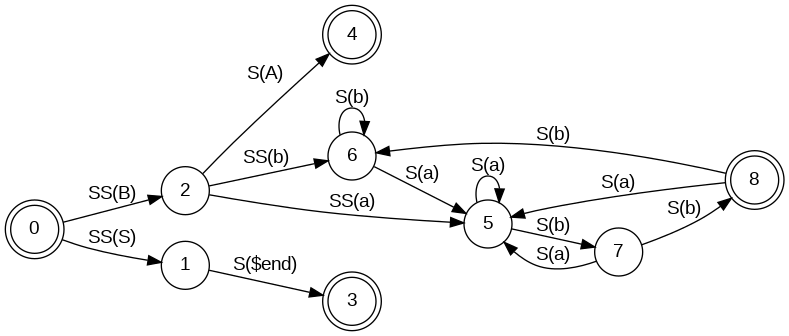

In [12]:
!apt -qqq install graphviz
!dot -Tpng dfd.dot > dfd.png
from IPython.display import Image
Image('dfd.png')